<a href="https://colab.research.google.com/github/Sudhir956020/DL_CNN/blob/main/CNN_dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kumarsudhir105","key":"f6914b5d52661ea368042c3c8943a064"}'}

In [2]:
!pip install kaggle



In [3]:
!mkdir -p ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 44.6MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.0MB/s]


In [7]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [21]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
         [141.72656   , 146.72656   , 150.72656   ],
         [140.96107   , 145.96107   , 149.96107   ],
         [140.86328   , 145.86328   , 149.86328   ]],

        [[ 54.        ,  59.        ,  63.        ],
         [ 54.89453   ,  59.89453   ,  63.89453   ],
         [ 54.129288  ,  59.129288  ,  63.129288  ],
         ...,
         [139.10547   , 144.10547   , 148.10547   ],
         [139.10547   , 144.10547   , 148.10547   ],
         [140.        , 145.        , 149.        ]],

        ...,

        [[ 74.109604  ,  78.109604  ,  79.109604  ],
         [ 90.714386  ,  94.714386  ,  95.714386  ],
         [ 88.275055  ,  92.275055  ,  93.275055  ],
         ...,
         [135.        , 139.        , 142.        ],
         [135.        , 139.        , 142.        ],
         [135.        , 139.        , 142.        ]],

        [[ 79.13277   ,  81.504     ,  84.13277   ],
         [102.42523   , 104.12877   , 105.89426   ],


In [12]:

model=Sequential()

In [13]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [24]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)


Epoch 1/2
625/625 [==============================] - 63s 80ms/step - loss: 2.1044 - accuracy: 0.5760 - val_loss: 0.6809 - val_accuracy: 0.5820
Epoch 2/2
625/625 [==============================] - 51s 81ms/step - loss: 0.7058 - accuracy: 0.5441 - val_loss: 0.6893 - val_accuracy: 0.5226


In [25]:
import matplotlib.pyplot as plt


In [26]:
dog_image=plt.imread(r"/content/dog.1.jpg")


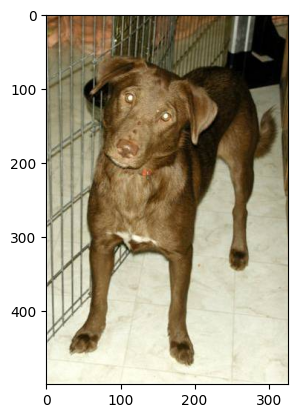

In [27]:
plt.imshow(dog_image)


In [28]:
cat_image=plt.imread(r"/content/cat.1.jpg")


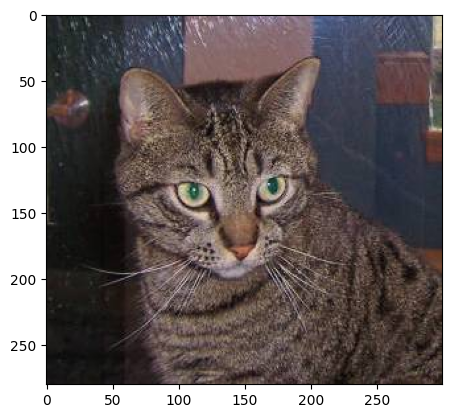

In [29]:
plt.imshow(cat_image)


In [30]:
dog_image.shape


(499, 327, 3)

In [31]:
cat_image.shape


(280, 300, 3)

In [32]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [33]:
dog_resize.shape


(256, 256, 3)

In [34]:
cat_resize.shape


(256, 256, 3)

In [35]:
dog_resize=dog_resize.reshape((1,256,256,3))


In [36]:
dog_resize.shape


(1, 256, 256, 3)

In [37]:
cat_resize=cat_resize.reshape((1,256,256,3))


In [38]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 392ms/step


In [39]:
pred

array([[0.4812507]], dtype=float32)

In [40]:
model.predict(cat_resize)


1/1 [==============================] - 0s 20ms/step


array([[0.48896533]], dtype=float32)

In [44]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog
